# This Project investigates the dataset containing information on patients' appointment in brazil, whether or not they show up for their appointments.

##  Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#conclusions">Limitations</a></li>
</ul>



<a id='intro'></a>
## Introduction

### Some of the questions I will be answering using this dataset are:

<ul>
<li>Question 1 Does Gender play a role in patients not showing up?</li>
<li>Question 2 Does the day of the week, affect Patients' ability to show up for appointments?</li>
<li>Question 3 Does SMS received have any impact on whether or not patients show up for their appointments?</li>
<li>Question 4 Does Scholarship impact patient's showing up?</li>
</ul>


## Dataset Description
This dataset contains of 14 features(columns) described below:

- PatientId: A Unique ID for each patient.
- AppointmentID: A unique ID for each appoimtment
- Gender: Patients are grouped into two gender, M (male) and F (female)
- ScheduledDay: The day the appointment was made.
- AppointmentDay: The date of the appointment.
- Age: The age of the patient.
- Neighbourhood: where the appointment takes place.
- Scholarship: Two unique values (0, 1) representing whether or not they had the scholarship.
- Hipertension: Two unique values (0, 1) representing whether or not they had hipertension.
- Diabetes: Two unique values (0, 1) representing whether or not they had diabetes.
- Alcoholism: Two unique values (0, 1) representing whether or not they were associated with alcoholism.
- Handcap: Two unique values (0, 1) representing whether or not they were handicapped.
- SMS_received: Two unique values (0, 1) representing whether or not they received sms confirmations.
- No-show: Two unique values (0, 1) representing whether or not the patient showed up for their appointment.

I will be needing some python packages to aid my analysis.
Pandas package to enable me load the dataset as a DataFrame and perform fast analysis on the dataset in lesser time.
Numpy package for numerical analysis
matplotlib for visualizations
Seaborn for aesthetically pleasing visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



Using the pandas read_csv method, I load my dataset into a dataframe "Noshow_df"
Next I call the info method on the dataframe to get a view of how many rows and columns are contained in my dataset.
After this I view the first five rows of my dataset by using the head method and limiting to 5.

In [2]:
Noshow_df = pd.read_csv('No_show_data.csv')
Noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
#view a sample of my dataframe
Noshow_df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### I checked for number of unique characters in each column using the method below.
My main focus is on the Patient ID, the appointment id and also to confirm that Alcoholism, Hipertension, Diabetes, Scholarship, SMS_received and No_show columns only have two values.

In [4]:
Noshow_df.nunique()


PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [5]:
### I will like to see the 5 unique values in my Handcap column
Noshow_df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [6]:
##See if i have duplicate rows
Noshow_df.duplicated().sum()

0

In [7]:
 ###Next I check the datatype of each column to see what it is.
 Noshow_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

I see that my “ScheduledDay” and “AppointmentDay” columns are supposed to be datetime but are both objects. I will further examine the types to see what they really are and proceed to convert them to datetime.

In [8]:
print(type(Noshow_df['ScheduledDay'][0]))
type(Noshow_df['AppointmentDay'][0])

<class 'str'>


str

In [9]:
#Next I change the ScheduledDay and AppointmentDay to datetime
Noshow_df['ScheduledDay'] = pd.to_datetime(Noshow_df['ScheduledDay'])
Noshow_df['AppointmentDay'] = pd.to_datetime(Noshow_df['AppointmentDay'])

In [10]:
Noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

Now I am comfortable with my dataset, I will run an exploratory analysis to see the data.

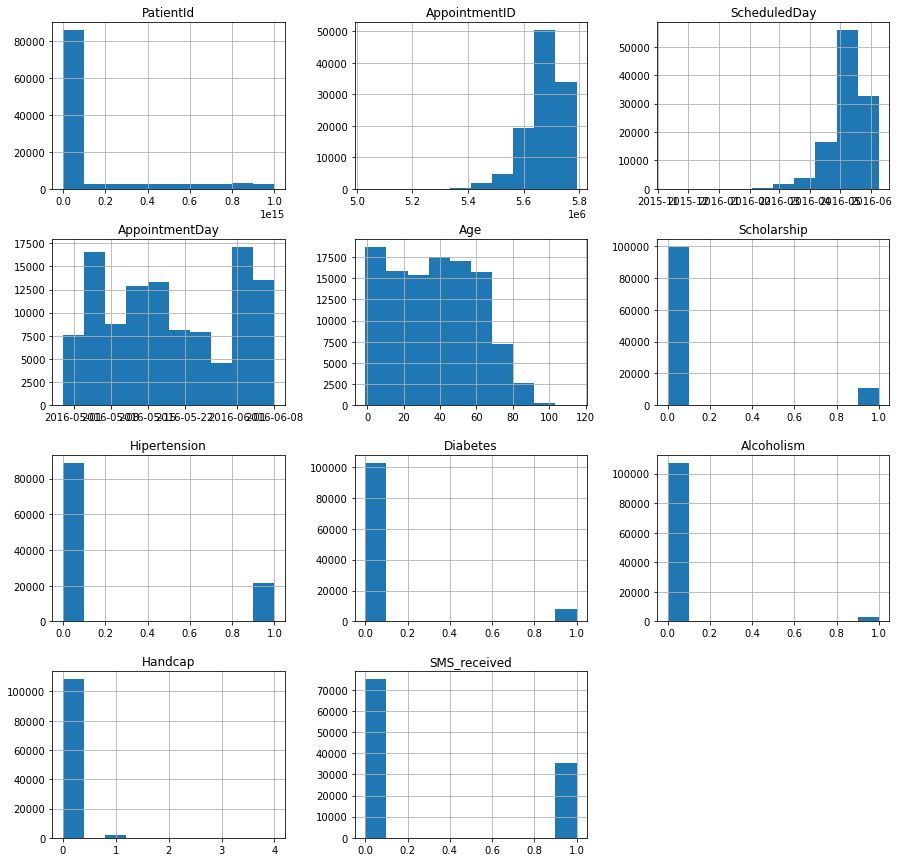

In [11]:
Noshow_df.hist(figsize= (15,15));

I would like to see the data on th No-show column and that is not showing so I proceed to plot using
`df['No-show'].plot(kind='hist')` and I get an error "TypeError: no numeric data to plot"
With this I go back to see what data type it is and its 2 unique value


In [12]:
#To see what data type the No-show column contains
print( type(Noshow_df['No-show'][0]))
#The two unique values in the No-show columns
Noshow_df['No-show'].unique()

<class 'str'>


array(['No', 'Yes'], dtype=object)

In [13]:
#using the replace function, I replace the values of the NO-show column with 0 and 1
#I also proceed to change the data type from str to numeric.

Noshow_df['No-show'].replace({"Yes":0,"No":1},inplace=True)

# 0 here means they did not show up, while 1 means they did.

Noshow_df['No-show'] = Noshow_df['No-show'].astype(int)

In [14]:
Noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [15]:
print( type(Noshow_df['No-show'][0]))

<class 'numpy.int32'>


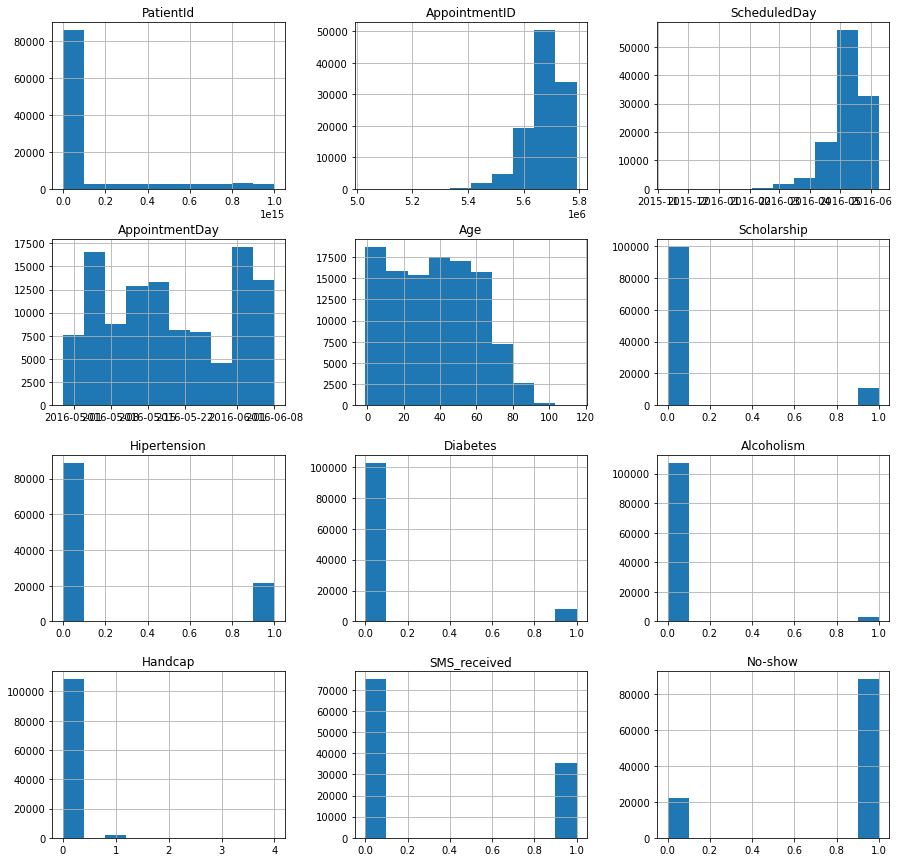

In [16]:
Noshow_df.hist(figsize= (15,15));

In [17]:
#To see the statistical analysis of the dataset,we call on the describe method.
Noshow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


Here, I see that i would like yo do the following.
1. Make PatientID and AppointmentID column a string.
2. See how many patients are less than one year of age.

In [18]:
Noshow_df['PatientId'] = Noshow_df['PatientId'].astype('str');
Noshow_df['AppointmentID'] = Noshow_df['AppointmentID'].astype('str')

In [19]:
Noshow_df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943000000000.0,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


From the above query, we see that this is an outlier. We may need to drop the row to avoid having skewed results.

In [20]:
Noshow_df.drop(Noshow_df.query('Age < 0').index, inplace = True)

In [21]:
#check to see if we have 1 less of 110527 entries.
Noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  object             
 1   AppointmentID   110526 non-null  object             
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

In [22]:
Noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872500000000.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558998000000000.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262960000000.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951000000.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841190000000.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis

1    88207
0    22319
Name: No-show, dtype: int64


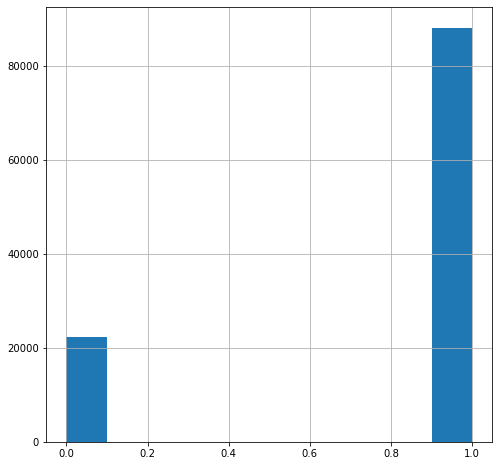

In [23]:
#To see how many patients showed up and how many did not.

print(Noshow_df['No-show'].value_counts())

Noshow_df['No-show'].hist(figsize= (8,8));

From the analysis above, we can see that only 22,319 patients did not show up and that 88,207 showed up for their appointments.


In [24]:
Yes_show = Noshow_df[Noshow_df['No-show'] == 1]
No_show = Noshow_df[Noshow_df['No-show'] == 0]
print(Yes_show.count())
print(No_show.count())


PatientId         88207
AppointmentID     88207
Gender            88207
ScheduledDay      88207
AppointmentDay    88207
Age               88207
Neighbourhood     88207
Scholarship       88207
Hipertension      88207
Diabetes          88207
Alcoholism        88207
Handcap           88207
SMS_received      88207
No-show           88207
dtype: int64
PatientId         22319
AppointmentID     22319
Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hipertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS_received      22319
No-show           22319
dtype: int64


 <a id='#A'></a>
 ## Question 1 
 
 Does Gender play a role in patients not showing up?


In [25]:
#First, I check the distribution of my dataset by gender.
print(Noshow_df['Gender'].value_counts())
#next I group it by whether or not they show up.
Noshow_df.groupby('Gender')['No-show'].value_counts().unstack()


F    71839
M    38687
Name: Gender, dtype: int64


No-show,0,1
Gender,,
F,14594,57245
M,7725,30962


The analysis of gender showing the grouping into Male and Female and a further breakdown with how many patients in each category showed up for their appointment.

In [26]:
round(Noshow_df.groupby('Gender')['No-show'].value_counts()/len(Noshow_df['SMS_received'])*100).unstack()


No-show,0,1
Gender,,
F,13.0,52.0
M,7.0,28.0


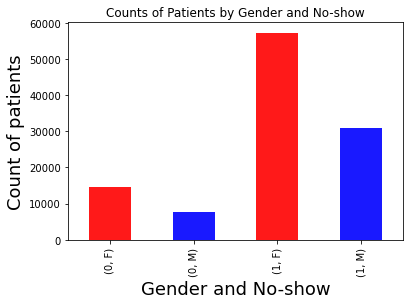

In [27]:
counts = Noshow_df.groupby(['No-show', 'Gender']).count()['PatientId']
colors = ['red', 'blue']
counts.plot(kind='bar', title='Counts of Patients by Gender and No-show', color=colors, alpha=.9);
plt.xlabel('Gender and No-show', fontsize=18)
plt.ylabel('Count of patients', fontsize=18);

From our analysis here, we see that Gender has nothing to do with whether or not they show up.

 <a id='#B'></a>
 ## Question 2 
 
 Does the day of the week, affect Patients' ability to show up for appointments.

In [28]:
print(Noshow_df.ScheduledDay.agg(['min', 'max']))
print(Noshow_df.AppointmentDay.agg(['min', 'max']))

min   2015-11-10 07:13:56+00:00
max   2016-06-08 20:07:23+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]
min   2016-04-29 00:00:00+00:00
max   2016-06-08 00:00:00+00:00
Name: AppointmentDay, dtype: datetime64[ns, UTC]


In [29]:
#Here we see the distribution of Patients and days when they showed up and didnt show up
print(No_show.groupby(No_show.AppointmentDay.dt.day_name())['No-show'].agg('count'));
Yes_show.groupby(Yes_show.AppointmentDay.dt.day_name())['No-show'].agg('count')


AppointmentDay
Friday       4037
Monday       4690
Saturday        9
Thursday     3338
Tuesday      5152
Wednesday    5093
Name: No-show, dtype: int64


AppointmentDay
Friday       14982
Monday       18024
Saturday        30
Thursday     13909
Tuesday      20488
Wednesday    20774
Name: No-show, dtype: int64

From the result above, we see that the day does not affect whether or not a patient will show up since the distribution of the No_show dataframe (patients who didnt show up) and the yes_show dataframe (patients who showed up) across the days of the week are almost same.

 <a id='#C'></a>
 ## Question 3
 
Does SMS received have any impact on whether or not patients show up for their appointments? 

    SMS received speaks to a reminder SMS sent to patients days before their appointment

In [30]:
#Count of patients that received and those that didnt receive SMS reminders
Noshow_df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

In [31]:
Noshow_df.groupby('SMS_received')['No-show'].value_counts().unstack()

No-show,0,1
SMS_received,,
0,12535,62509
1,9784,25698


In [32]:

round(Noshow_df.groupby('SMS_received')['No-show'].value_counts()/len(Noshow_df['SMS_received'])*100).unstack()


No-show,0,1
SMS_received,,
0,11.0,57.0
1,9.0,23.0


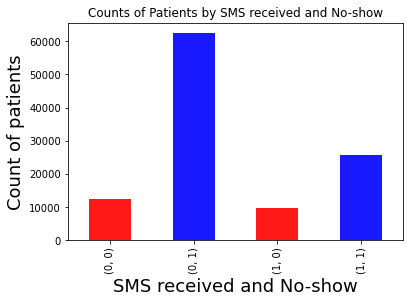

In [33]:
counts = Noshow_df.groupby(['SMS_received','No-show']).count()['PatientId']
colors = ['red', 'blue']
counts.plot(kind='bar', title='Counts of Patients by SMS received and No-show', color=colors, alpha=.9);
plt.xlabel('SMS received and No-show', fontsize=18)
plt.ylabel('Count of patients', fontsize=18);

23% received SMS but only 9% showed up for their appointment.
It is safe to say that the SMS played no role in helping patients show up for their appointment.

 <a id='#D'></a>
 ## Question 4

 
 Does Scholarship impact patient's showing up?

The scholarship column speaks to whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.



In [34]:
print(Noshow_df['Scholarship'].value_counts())
Noshow_df.groupby('Scholarship')['No-show'].value_counts().unstack()

0    99665
1    10861
Name: Scholarship, dtype: int64


No-show,0,1
Scholarship,,
0,19741,79924
1,2578,8283


Text(0.5, 0, 'Count')

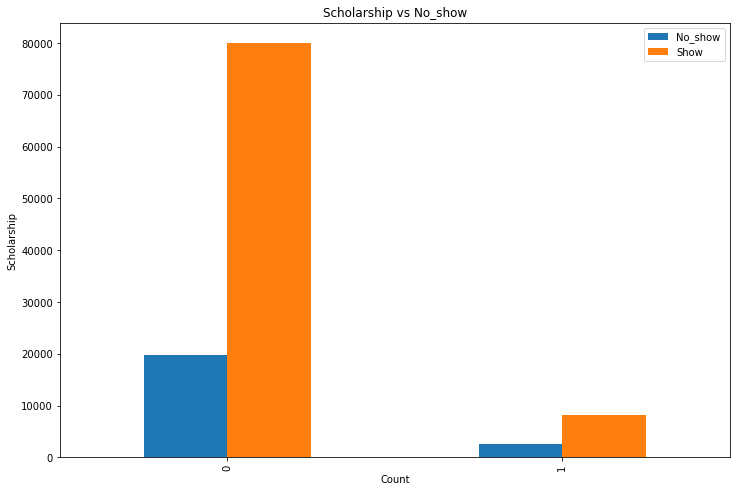

In [46]:
df1 = Noshow_df.groupby('Scholarship')['No-show'].value_counts().unstack()
df1.plot(kind = 'bar', figsize = (12,8))
plt.title("Scholarship vs No_show")
plt.legend(['No_show','Show'])
plt.ylabel("Scholarship")
plt.xlabel("Count")

The scholarship also does not affect or help patient's to show up as seen in the chart above,

<a id='conclusions'></a>
## Conclusions

From my investigation so far, I can say that Gender has no effect on why patients do not show up. Also, the SMS did not affect patients' showing up. 
I further investigated to see if the day of the week was a factor, but my results showed that this was not a factor as wednesday showed to have more patients that show up and those that didn't show up. 

I would suggest that Patient's relationship with the medical practitioner should be looked into. Either a survey to patients to ascertain whether distance or relationship or other factors not recorded here are the reasons behind their not showing up.



<a id='Limitations'></a>
## Limitations

Some the limitations to this dataset are:

1. The Appointment day column should have contained actual timestamps as opposed to the zero figures. This will aid me to deduce whether most patients did not show up because of the time of their appointment.
2. I was unable to figure out how location affects Patient's ability to show up because there was no data on distance or time needed to get to appointment destination
3. In this analysis, I have not considered other variables that may affect the paient's showing up for their appointments like certain given conditions like diabetes, hypertension or being handicapped or alcoholic. and neigbourhood too.